In [3]:
from pygam import s, f, LinearGAM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = load_diabetes()


In [4]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Split the data into training and testing sets
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('target', axis=1).to_numpy(),
    df['target'].to_numpy(),
    test_size=0.2,
    random_state=42,
)

In [5]:
# LinearGAM class for implementing Generalized Additive Models
gam = LinearGAM(n_splines=35)
print(gam)

gam.gridsearch(X_train, y_train)



  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:00
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00


LinearGAM(callbacks=['deviance', 'diffs'], fit_intercept=True, 
   max_iter=100, n_splines=35, scale=None, terms='auto', tol=0.0001, 
   verbose=False)


 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00
 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00
 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00
 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + intercept,
   tol=0.0001, verbose=False)

In [6]:
gam.gridsearch(X_train, y_train, lam = np.logspace(-1, 2, 2))

  0% (0 of 2) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--
 50% (1 of 2) |#############             | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (2 of 2) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + intercept,
   tol=0.0001, verbose=False)

In [7]:
print(gam.summary())

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     28.5697
Link Function:                     IdentityLink Log Likelihood:                                 -3131.3522
Number of Samples:                          353 AIC:                                             6321.8438
                                                AICc:                                            6327.4508
                                                GCV:                                             3319.9418
                                                Scale:                                           2840.0752
                                                Pseudo R-Squared:                                   0.5704
Feature Function                  Lam

/var/folders/sx/1v4_rhcd3h998mhd7mxbvfl00000gn/T/ipykernel_62893/3564666153.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


ValueError: X data must have 10 features, but found 1

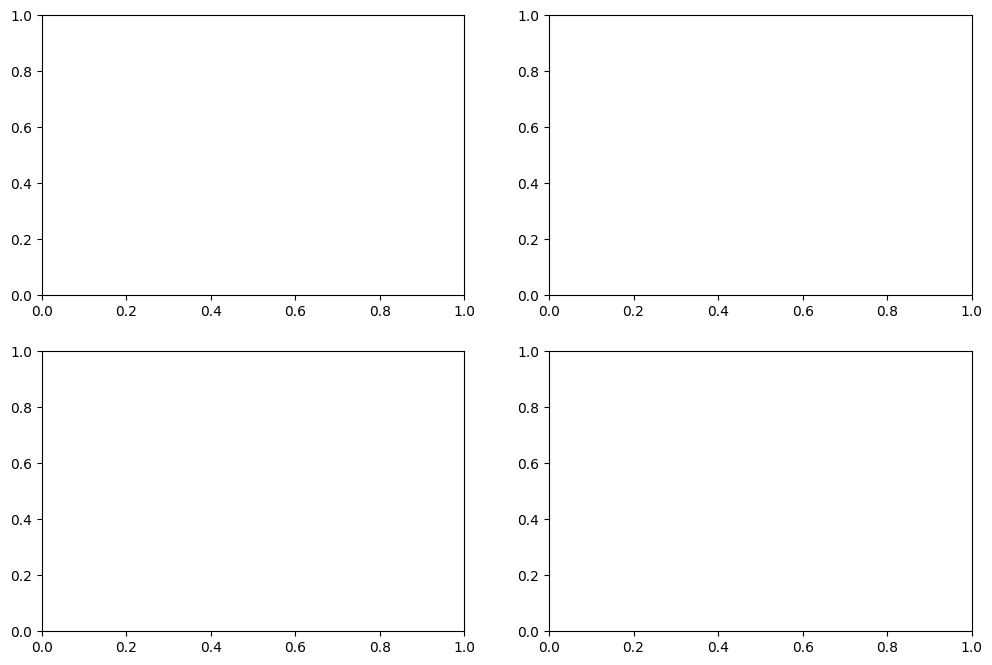

In [13]:
grid_locs = [(0, 0), (0, 1), (1, 0), (1, 1)]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

def gam_generate_X_grid(term):
    if term == 0:
        return np.linspace(0, 1, 100)
    elif term == 1:
        return np.linspace(0, 1, 100)
    else:
        return np.linspace(0, 1, 100)

feature_names = diabetes.feature_names
for i, feature in enumerate(feature_names[:4]):
    gi = grid_locs[i]
    XX = gam_generate_X_grid(term = i)
    pdep, preds = gam.partial_dependence(term = i, X = XX)
    ax[gi[0], gi[1]] = axs[gi]
    ax.plot(pdep, preds)
    ax.set_title(f'Partial dependence of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Partial dependence')
    
    